In [7]:
file = './原书代码数据/chapter15/demo/data/meidi_jd.txt'
with open(file,'r',encoding='utf-8') as f:
#     f.readline()
    data = pd.read_csv(f,delimiter='\t',header=None)
data[:5]

,0
0,京东商城信得过，买的放心，用的省心、安心、放心！
1,给公司宿舍买的，上门安装很快，快递也送的及时，不错的。给五分吧
2,美的值得信赖，质量不错
3,不错不错的哦，第一次在京东买这些产品，感觉相当好
4,很满意，水方一晚上都还是热的早上还能再洗，


# 数据去重

## 原始去重

In [16]:
data_unique = data[0].unique()
len(data) - len(data_unique)

2336

# LDA

In [30]:
# %load ./原书代码数据/chapter15/demo/code/15-5_LDA.py
import pandas as pd

#参数初始化
negfile = './原书代码数据/chapter15/demo/data/meidi_jd_neg_cut.txt'
posfile = './原书代码数据/chapter15/demo/data/meidi_jd_pos_cut.txt'
stoplist = './原书代码数据/chapter15/demo/data/stoplist.txt'

with open(negfile, 'r',encoding='utf-8') as f:
    neg = pd.read_csv(f, header = None) #读入数据

with open(posfile,'r',encoding='utf-8') as f:
    pos = pd.read_csv(f, header = None)

with open(stoplist,'r',encoding='utf-8') as f:
    stop = pd.read_csv(f, header = None, sep = 'tipdm')
#sep设置分割词，由于csv默认以半角逗号为分割词，而该词恰好在停用词表中，因此会导致读取出错
#所以解决办法是手动设置一个不存在的分割词，如tipdm。
stop = [' ', ''] + list(stop[0]) #Pandas自动过滤了空格符，这里手动添加

neg[1] = neg[0].apply(lambda s: s.split(' ')) #定义一个分割函数，然后用apply广播
neg[2] = neg[1].apply(lambda x: [i for i in x if i not in stop]) #逐词判断是否停用词，思路同上
pos[1] = pos[0].apply(lambda s: s.split(' '))
pos[2] = pos[1].apply(lambda x: [i for i in x if i not in stop])

from gensim import corpora, models

#负面主题分析
neg_dict = corpora.Dictionary(neg[2]) #建立词典
neg_corpus = [neg_dict.doc2bow(i) for i in neg[2]] #建立语料库
neg_lda = models.LdaModel(neg_corpus, num_topics = 3, id2word = neg_dict) #LDA模型训练
for i in range(3):
    neg_lda.print_topic(i) #输出每个主题

#正面主题分析
pos_dict = corpora.Dictionary(pos[2])
pos_corpus = [pos_dict.doc2bow(i) for i in pos[2]]
pos_lda = models.LdaModel(pos_corpus, num_topics = 3, id2word = pos_dict)
for i in range(3):
    neg_lda.print_topic(i) #输出每个主题

F:\ProgramData\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
F:\ProgramData\Anaconda3\envs\normal\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


'0.043*"安装" + 0.038*"不错" + 0.018*"好" + 0.018*"热水器" + 0.016*"师傅" + 0.014*"加热" + 0.011*"东西" + 0.010*"买" + 0.008*"有点" + 0.008*"美的"'

'0.045*"安装" + 0.019*"买" + 0.016*"知道" + 0.013*"好" + 0.013*"美的" + 0.011*"热水器" + 0.011*"问题" + 0.010*"使用" + 0.009*"师傅" + 0.008*"送货"'

'0.026*"安装" + 0.021*"热水器" + 0.020*"买" + 0.013*"安装费" + 0.010*"京东" + 0.009*"东西" + 0.007*"装" + 0.007*"好" + 0.006*"知道" + 0.006*"美的"'

'0.043*"安装" + 0.038*"不错" + 0.018*"好" + 0.018*"热水器" + 0.016*"师傅" + 0.014*"加热" + 0.011*"东西" + 0.010*"买" + 0.008*"有点" + 0.008*"美的"'

'0.045*"安装" + 0.019*"买" + 0.016*"知道" + 0.013*"好" + 0.013*"美的" + 0.011*"热水器" + 0.011*"问题" + 0.010*"使用" + 0.009*"师傅" + 0.008*"送货"'

'0.026*"安装" + 0.021*"热水器" + 0.020*"买" + 0.013*"安装费" + 0.010*"京东" + 0.009*"东西" + 0.007*"装" + 0.007*"好" + 0.006*"知道" + 0.006*"美的"'

(-0.5, 399.5, 199.5, -0.5)

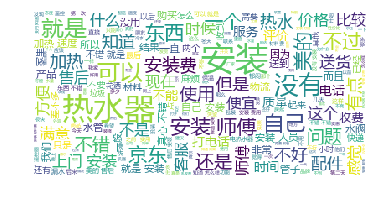

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.misc import imread
import jieba,os

#读取一个txt文件
text = open(negfile,'r',encoding='utf-8').read()
    #结巴分词，生成字符串，如果不通过分词，无法直接生成正确的中文词云
cut_text = " ".join(jieba.cut(text))
# color_mask = imread("Anne_Hathaway.png") # 读取背景图片
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path='‪C:\Windows\Fonts\msyh.ttc',
    #font_path=path.join(d,'simsun.ttc'),
    #设置背景色
    background_color='white',
    #词云形状
#     mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=40
)
word_cloud = cloud.generate(cut_text) # 产生词云
# word_cloud.to_file("pjl_cloud4.jpg") #保存图片
#  显示词云图片
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


(-0.5, 399.5, 199.5, -0.5)

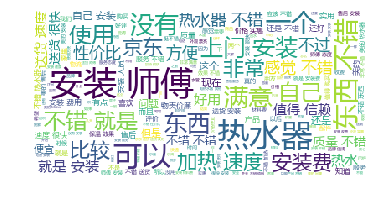

In [52]:
#读取一个txt文件
text = open(posfile,'r',encoding='utf-8').read()
    #结巴分词，生成字符串，如果不通过分词，无法直接生成正确的中文词云
cut_text = " ".join(jieba.cut(text))
# color_mask = imread("Anne_Hathaway.png") # 读取背景图片
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path='‪C:\Windows\Fonts\msyh.ttc',
    #font_path=path.join(d,'simsun.ttc'),
    #设置背景色
    background_color='white',
    #词云形状
#     mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=40
)
word_cloud = cloud.generate(cut_text) # 产生词云
# word_cloud.to_file("pjl_cloud4.jpg") #保存图片
#  显示词云图片
plt.imshow(word_cloud)
plt.axis('off')
plt.show()
